In [8]:
# Low-level import 
from numpy import *
import numpy as np
from numpy.fft import fft,fftshift,fftfreq
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Setup plotting backend
import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 0.8
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.labelsize'] = 20
from matplotlib.pyplot import *
#
import positive
from positive import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(0.1, 100.0)

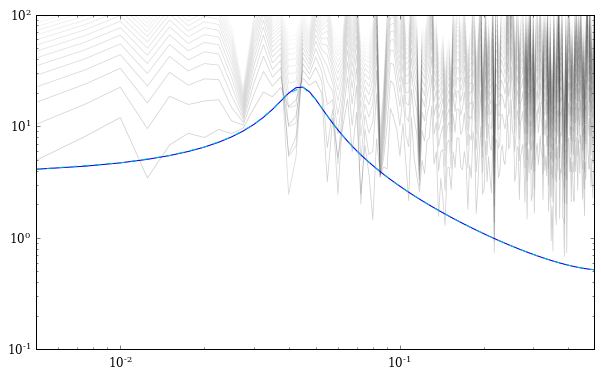

In [55]:
t = linspace( 0,100,2e2 )
dt = diff(t)[0]
r = exp( 1j*(0.55+1j*0.09)*t )
y = hstack( [zeros(t.shape),r] )

ns = linspace(0,20,20)
noise = np.random.random( y.shape )

figure( figsize=2*array([5,3]) )
clr = rgb( len(ns), grayscale=True )
for k,s in enumerate(ns):
    
    y_ = y + s*noise
    # plot( arange(len(y))*dt,y.real)

    f = fftshift( fftfreq( len(y) ) )
    Y_ = fftshift( fft(y_) )

    plot( f, abs(Y_), color='k', alpha= 0.2*(1-(k+1.0)/len(ns)) )


f = fftshift( fftfreq( len(y) ) )
Y = fftshift( fft(y) )
plot( f, abs(Y), 'b', lw=1 )

fr = fftshift( fftfreq( len(r) ) )
R = fftshift( fft(r) )
plot( fr, abs(R), '--c', lw=1 )

yscale('log')
xscale('log')
xlim( lim( fr[fr>0] ) )
ylim( [1e-1,1e2] )


In [23]:
?rgb